In [1]:
import numpy
import scipy
from matplotlib import pyplot
from mpl_toolkits.basemap import Basemap
import matplotlib.colors
nicebwr = matplotlib.colors.LinearSegmentedColormap.from_list("nicebwr",["#094da0","#FFFFFF","#ef1a2d"])
import scha

import importlib
importlib.reload(scha)

cos = numpy.cos; sin = numpy.sin

%matplotlib nbagg

In [6]:
datos = numpy.loadtxt("/home/josecper/Programs/data/scha/pruebas/output.dat",
                      usecols=(1, 2, 7, 8, 9)).T

thetav = numpy.deg2rad(90 - datos[0])
phiv = numpy.deg2rad(datos[1])

#datos originales, rotados por javi
#Bx, By, Bz = datos[2:]

Bx_o, By_o, Bz_o = numpy.loadtxt("/home/josecper/Programs/data/scha/pruebas/output.dat",
                      usecols=(4, 5, 6)).T

Bx_r = numpy.empty_like(Bx); By_r = numpy.empty_like(By); Bz_r = numpy.empty_like(Bz)

for i, (xx, yy, zz, th_i, phi_i, th_ri) in enumerate(zip(Bx_o,By_o,Bz_o,thetav,phiv,theta_r)):
    #x_r[i], y_r[i], z_r[i] = scha.rotate_vector(xx, yy, zz, th_p, ph_p, th_i, phi_i, th_ri)
    Bx_r[i], By_r[i], Bz_r[i] = scha.rotate_vector(xx, yy, zz, theta_c, phi_c,
                                                   th_i, phi_i, th_ri)

theta_c, phi_c, theta_0d, theta_0 = numpy.deg2rad((90-45.0, 15.0, 20.0, 50.0))

rot_mat = scha.rotation_matrix(theta_c, phi_c, invert=True)
r, theta_r, phi_r = scha.rotate_coords(1.0, thetav, phiv, rot_mat)

In [3]:
ms = numpy.arange(0, 8);
roots = scha.degree(ms, theta0 = theta_0, max_k = 7)
k, m, n = scha.join_roots(roots)

In [7]:
importlib.reload(scha)
gp=scha.invert_xyz(theta_r, phi_r, Bx_r, By_r, Bz_r, (k, m, n))
Bx_inv, By_inv, Bz_inv = scha.xyzfield(k, m, n, gp, theta_r, phi_r)

<IPython.core.display.Javascript object>


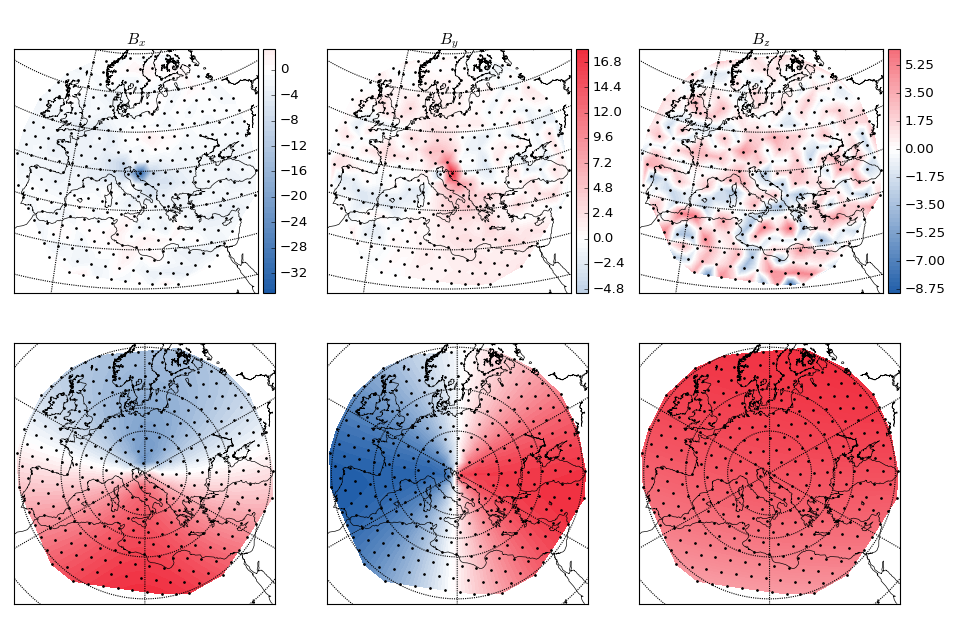

In [8]:
fig, axes = pyplot.subplots(2, 3, figsize=(12,8))

base = Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-20)
base2 = Basemap(projection="aeqd", lon_0 = 15.0, lat_0=45.0, lat_ts=45.0,
                width=base.xmax, height=base.ymax, resolution="l")
#scha.polar_contour(Bx_r, theta_r, phi_r, theta_0, ax=ax, resolution=200, base=base)
base.colorbar(scha.polar_tricontour(Bx_inv-Bx, theta_r, phi_r, theta_0, ax=axes[0][0], base=base, cmap=nicebwr),ax=axes[0][0])
base.colorbar(scha.polar_tricontour(By_inv-By, theta_r, phi_r, theta_0, ax=axes[0][1], base=base, cmap=nicebwr),ax=axes[0][1])
base.colorbar(scha.polar_tricontour(Bz_inv-Bz, theta_r, phi_r, theta_0, ax=axes[0][2], base=base, cmap=nicebwr),ax=axes[0][2])

axes[0][0].set_title("$B_{x}$")
axes[0][1].set_title("$B_{y}$")
axes[0][2].set_title("$B_{z}$")

scha.polar_tricontour(Bx, theta_r, phi_r, theta_0, ax=axes[1][0], base=base, cmap=nicebwr)
scha.polar_tricontour(By, theta_r, phi_r, theta_0, ax=axes[1][1], base=base, cmap=nicebwr)
scha.polar_tricontour(Bz, theta_r, phi_r, theta_0, ax=axes[1][2], base=base, cmap=nicebwr)

for ax in axes[0]:
    base2.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base2.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)
    
for ax in axes[1]:
    base.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)

fig.tight_layout()
pyplot.show(fig)

histogramos

In [37]:
Bx_res_freq, Bx_res_hist = numpy.histogram(Bx_inv-Bx, bins="fd")
By_res_freq, By_res_hist = numpy.histogram(By_inv-By, bins="fd")
Bz_res_freq, Bz_res_hist = numpy.histogram(Bz_inv-Bz, bins="fd")

<IPython.core.display.Javascript object>


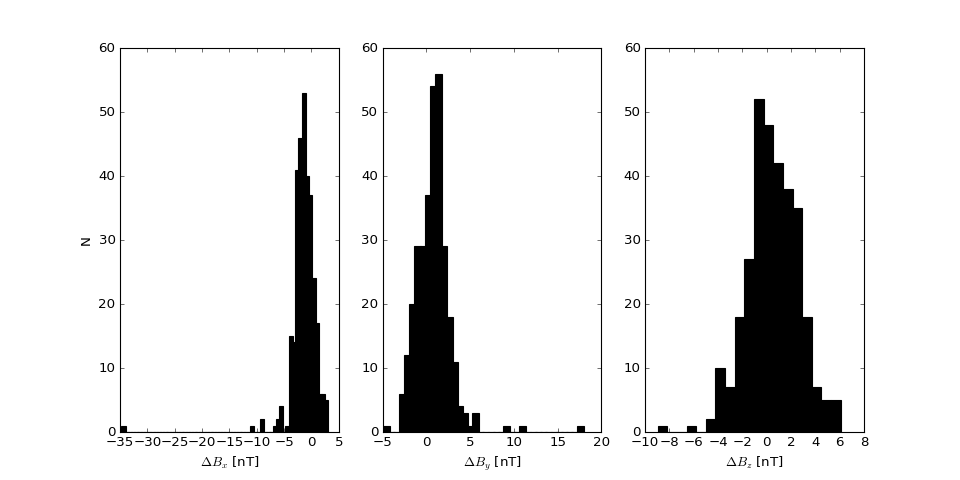

In [40]:
fig, (ax_x, ax_y, ax_z) = pyplot.subplots(1, 3, figsize=(12, 6))

ax_x.bar(Bx_res_hist[:-1], Bx_res_freq, color="black"); ax_x.set_xlabel("$\Delta B_{x}$ [nT]"); ax_x.set_ylabel("N")
ax_y.bar(By_res_hist[:-1], By_res_freq, color="black"); ax_y.set_xlabel("$\Delta B_{y}$ [nT]")
ax_z.bar(Bz_res_hist[:-1], Bz_res_freq, color="black"); ax_z.set_xlabel("$\Delta B_{z}$ [nT]")

pyplot.show(fig)

*** lo que está mal es la rotación de los vectorcitos ***

*(voz de detective amargado)* vamos a llegar al fondo de este asunto maldita sea 

In [29]:
#datos originales, pre-rotación
Bx_o, By_o, Bz_o = numpy.loadtxt("/home/josecper/Programs/data/scha/pruebas/output.dat",
                      usecols=(4, 5, 6)).T

Bx_r = numpy.empty_like(Bx); By_r = numpy.empty_like(By); Bz_r = numpy.empty_like(Bz)

for i, (xx, yy, zz, th_i, phi_i, th_ri) in enumerate(zip(Bx_o,By_o,Bz_o,thetav,phiv,theta_r)):
    #x_r[i], y_r[i], z_r[i] = scha.rotate_vector(xx, yy, zz, th_p, ph_p, th_i, phi_i, th_ri)
    Bx_r[i], By_r[i], Bz_r[i] = scha.rotate_vector(xx, yy, zz, theta_c, phi_c,
                                                   th_i, phi_i, th_ri)

<IPython.core.display.Javascript object>


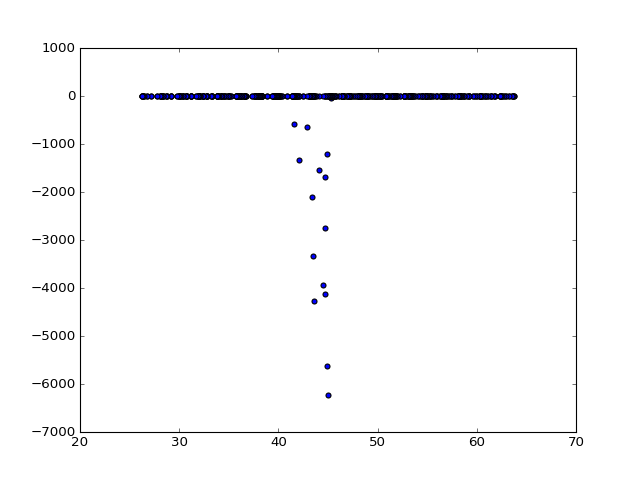

In [40]:
fig, ax = pyplot.subplots()

ax.scatter(numpy.rad2deg(thetav), Bx_r-Bx)

la cagada está en latitudes cercanas al centro del casquete

In [49]:
import xyzfield
D_buena = xyzfield.xyz2difh(Bx, By, Bz)[0]
D_o = xyzfield.xyz2difh(Bx_o, By_o, Bz_o)[0]
D_cagada = xyzfield.xyz2difh(Bx_r, By_r, Bz_r)[0]

angulo = D_cagada - D_o

In [48]:
def angular_diff(a1, a2):
    return numpy.arctan2(numpy.sin(a1-a2), numpy.cos(a1-a2))

<IPython.core.display.Javascript object>


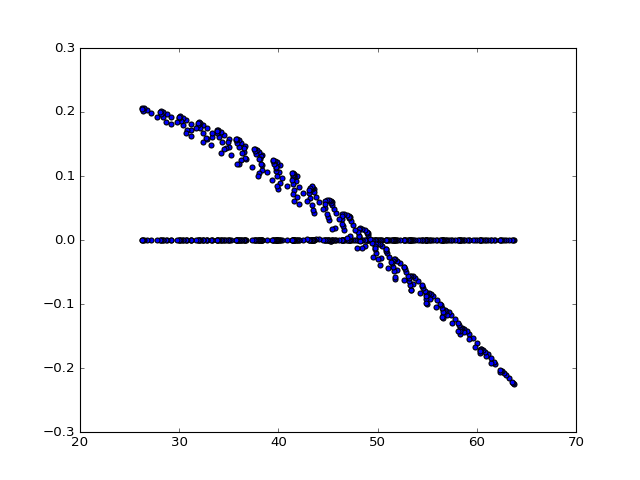

In [57]:
fig, ax = pyplot.subplots()

ax.scatter(numpy.rad2deg(thetav), angular_diff(D_buena, D_cagada)/(numpy.pi-2*angulo))
ax.scatter(numpy.rad2deg(thetav), cos(theta_r)*cos(thetav)-cos(theta_0))

te he pillador

In [58]:
importlib.reload(scha)
D_cagada = scha.rotate_declination(D_o, theta_c, phi_c, thetav, phiv, theta_r)